# Problem Statement

1) With the given independent features predict the Youngs Modulus using regression

2) With the given lab test results predict whether the product quality is good or bad using classification

### Importing required libraries

In [1]:
# Basic
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#from autoviz.AutoViz_Class import AutoViz_Class


# Data Processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.tools.tools import add_constant


# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

# Metics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [2]:
# reading the file
df=pd.read_excel("Data.xlsx")

In [3]:
df.shape

(430, 17)

In [4]:
# Checking the basic structure of the data using head
df.head()

,Grade Name,Polymer Types,Primary Filler type,% of Primary filler,Secondary filler type,% of secondary filler,Orientation,Strain Rate(%/s),Temperature,Youngs modulus (MPa),Yield Strain (%),Yield Stress (MPa),Elongation at break (%),Strength at break (MPa),Quality,Unnamed: 15,Input Factors
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,L1006,L,1.0,6.0,0,0.0,0.0,0.0833,52.0,4870.0,6.6,89.6,7.4,88.9,Good,NaN,Target factors
2,L1006,L,1.0,6.0,0,0.0,0.0,0.0833,107.0,4190.0,7.3,70.0,7.7,69.6,Good,NaN,NaN
3,L1006,L,1.0,6.0,0,0.0,0.0,0.0833,23.0,7270.0,4.0,118.0,5.9,117.0,Good,NaN,NaN
4,L1006,L,1.0,6.0,0,0.0,0.0,0.0833,121.0,3870.0,10.0,77.6,10.0,77.6,Good,NaN,NaN


# EDA

In [5]:
df.columns

Index(['Grade Name', 'Polymer Types', 'Primary Filler type',
       '% of Primary filler', 'Secondary filler type', '% of secondary filler',
       'Orientation', 'Strain Rate(%/s)', 'Temperature',
       'Youngs modulus (MPa)', 'Yield Strain (%)', 'Yield Stress (MPa)',
       'Elongation at break (%)', 'Strength at break  (MPa)', 'Quality',
       'Unnamed: 15', 'Input Factors'],
      dtype='object')

In [6]:
#dropping the unwanted columns
df.drop(columns=['Grade Name','Unnamed: 15', 'Input Factors'],inplace=True)

In [7]:
# There are a total of 430 data points and 14 data features
df.shape

(430, 14)

### Analysing the basic metrics

In [8]:
# Checking the data type of all the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Polymer Types             429 non-null    object 
 1   Primary Filler type       429 non-null    float64
 2   % of Primary filler       426 non-null    float64
 3   Secondary filler type     429 non-null    object 
 4   % of secondary filler     412 non-null    float64
 5   Orientation               429 non-null    float64
 6   Strain Rate(%/s)          429 non-null    float64
 7   Temperature               429 non-null    float64
 8   Youngs modulus (MPa)      428 non-null    float64
 9   Yield Strain (%)          427 non-null    float64
 10  Yield Stress (MPa)        428 non-null    float64
 11  Elongation at break (%)   427 non-null    float64
 12  Strength at break  (MPa)  428 non-null    float64
 13  Quality                   429 non-null    object 
dtypes: float64

In [9]:
# Checking the stastistical value of each features
df.describe()

,Primary Filler type,% of Primary filler,% of secondary filler,Orientation,Strain Rate(%/s),Temperature,Youngs modulus (MPa),Yield Strain (%),Yield Stress (MPa),Elongation at break (%),Strength at break (MPa)
count,429.000000,426.000000,412.000000,429.000000,429.000000,429.000000,428.000000,427.000000,428.000000,427.000000,428.000000
mean,0.573427,2.152113,0.209709,0.839161,11.412170,43.156177,5689.282570,6.994333,80.817126,41.806169,78.160584
std,0.771782,3.021174,0.752678,8.095213,89.895071,49.386861,5707.299646,14.676442,48.180093,47.360811,49.655045
min,0.000000,0.000000,0.000000,0.000000,0.000100,-60.000000,1.860000,0.000000,0.000000,0.500000,1.850000
25%,0.000000,0.000000,0.000000,0.000000,0.083300,23.000000,2247.500000,2.400000,53.000000,2.569000,47.775000
50%,0.000000,0.000000,0.000000,0.000000,0.083300,23.000000,2665.000000,4.410000,65.400000,10.000000,61.900000
75%,1.000000,5.000000,0.000000,0.000000,0.833000,75.000000,7937.500000,6.320000,94.700000,83.615000,93.850000
max,2.000000,10.000000,4.000000,90.000000,833.300000,176.000000,32200.000000,151.000000,276.000000,158.000000,276.000000


In [10]:
#finding number of null values
df.isnull().sum()

Polymer Types                1
Primary Filler type          1
% of Primary filler          4
Secondary filler type        1
% of secondary filler       18
Orientation                  1
Strain Rate(%/s)             1
Temperature                  1
Youngs modulus (MPa)         2
Yield Strain (%)             3
Yield Stress (MPa)           2
Elongation at break (%)      3
Strength at break  (MPa)     2
Quality                      1
dtype: int64

In [11]:
#dropping all the null values
df.dropna(inplace=True)

In [12]:
df.shape
# 21 records removed

(409, 14)

In [13]:
df.isnull().sum()

Polymer Types               0
Primary Filler type         0
% of Primary filler         0
Secondary filler type       0
% of secondary filler       0
Orientation                 0
Strain Rate(%/s)            0
Temperature                 0
Youngs modulus (MPa)        0
Yield Strain (%)            0
Yield Stress (MPa)          0
Elongation at break (%)     0
Strength at break  (MPa)    0
Quality                     0
dtype: int64

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape
# 31 duplicate records removed

(378, 14)

### Non-Graphical Analysis

In [16]:
df.nunique()
# mostly Secondary filler type, Quality, Polymer Types, Primary Filler type, Orientation  and Quality are categorical variable.
# Need to check the same

Polymer Types                12
Primary Filler type           3
% of Primary filler          13
Secondary filler type         3
% of secondary filler         6
Orientation                   3
Strain Rate(%/s)             11
Temperature                  40
Youngs modulus (MPa)        245
Yield Strain (%)            294
Yield Stress (MPa)          285
Elongation at break (%)     328
Strength at break  (MPa)    297
Quality                       3
dtype: int64

In [17]:
df['Secondary filler type'].unique()  

array([0, 3, 1], dtype=object)

In [18]:
df['Quality'].unique()  
#expected  just 2 output but got 3

array(['Good', 'Bad ', 'Bad'], dtype=object)

In [19]:
df['Quality'].replace('Bad ','Bad',inplace=True)
# replacing value with 'Bad ' with 'Bad'

In [20]:
df['Quality'].unique()
# Corrected

array(['Good', 'Bad'], dtype=object)

In [21]:
df['Orientation'].unique() 
# 3 types of orientation

array([ 0., 45., 90.])

In [22]:
df['Primary Filler type'].unique() 
# 3 types of fillers

array([1., 2., 0.])

In [23]:
df['Polymer Types'].unique() 
# 12 types of polymer types

array(['L', 'M', 'F', 'W', 'X', 'A', 'AA', 'S', 'XX', 'PR', 'H', 'CY'],
      dtype=object)

# Visual Analysis

C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quality', ylabel='count'>

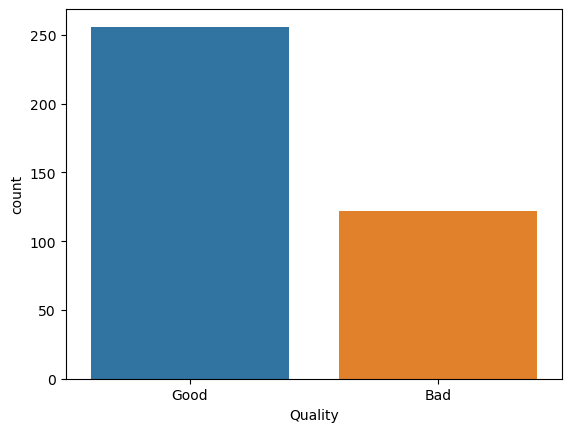

In [24]:
sns.countplot(df['Quality'])

#### Classification data is unbalanced.  Accuracy is not be the best metrice. 
#### Classifying a bad quaility item as good quality can affect the reputation of the company.
#### So model with most Flase Negative is to be penalised
#### We need to optimize the algorithm for best Recall

C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Polymer Types', ylabel='count'>

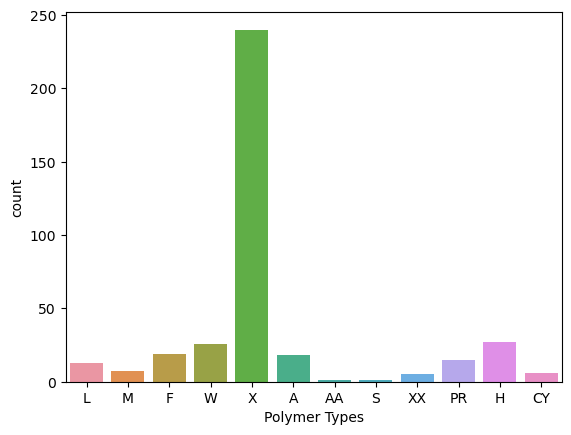

In [25]:
sns.countplot(df['Polymer Types'])

##### Data mostly representing polymer types X

<AxesSubplot:xlabel='Secondary filler type', ylabel='count'>

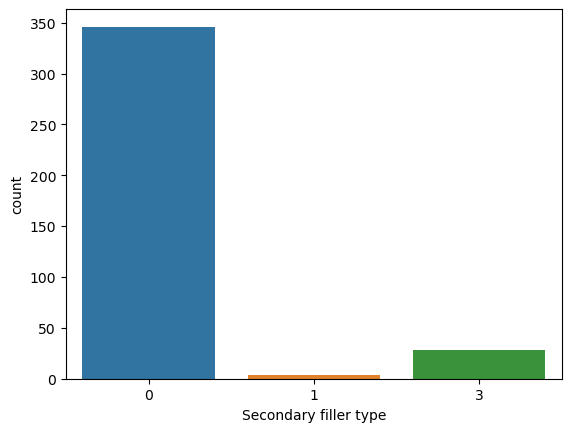

In [26]:
sns.countplot(data=df,x='Secondary filler type')

##### Most polymer secondary filler material is not used 

C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Orientation', ylabel='count'>

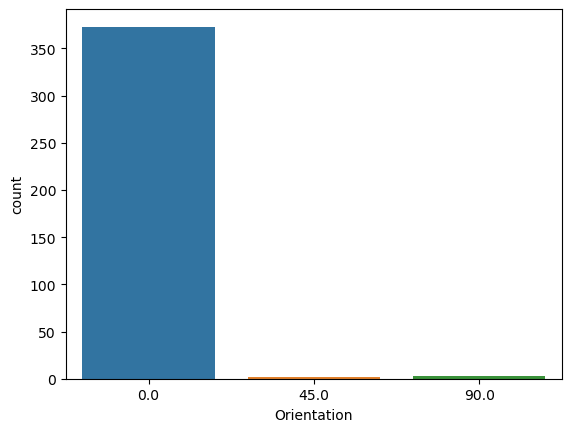

In [27]:
sns.countplot(df['Orientation'])

##### Fillers are mostly oriented at 0 degrees

<AxesSubplot:xlabel='Polymer Types', ylabel='Youngs modulus (MPa)'>

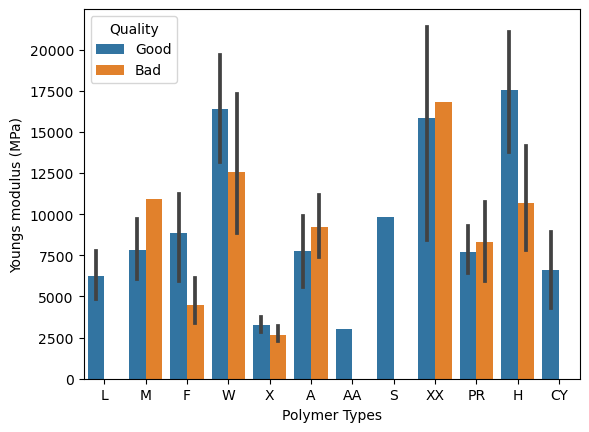

In [28]:
sns.barplot(data=df,x='Polymer Types',y='Youngs modulus (MPa)',hue="Quality")

In [29]:
df.columns

Index(['Polymer Types', 'Primary Filler type', '% of Primary filler',
       'Secondary filler type', '% of secondary filler', 'Orientation',
       'Strain Rate(%/s)', 'Temperature', 'Youngs modulus (MPa)',
       'Yield Strain (%)', 'Yield Stress (MPa)', 'Elongation at break (%)',
       'Strength at break  (MPa)', 'Quality'],
      dtype='object')

AxesSubplot(0.125,0.11;0.775x0.77) L
AxesSubplot(0.125,0.11;0.775x0.77) M
AxesSubplot(0.125,0.11;0.775x0.77) F
AxesSubplot(0.125,0.11;0.775x0.77) W
AxesSubplot(0.125,0.11;0.775x0.77) X
AxesSubplot(0.125,0.11;0.775x0.77) A
AxesSubplot(0.125,0.11;0.775x0.77) AA
AxesSubplot(0.125,0.11;0.775x0.77) S
AxesSubplot(0.125,0.11;0.775x0.77) XX
AxesSubplot(0.125,0.11;0.775x0.77) PR
AxesSubplot(0.125,0.11;0.775x0.77) H
AxesSubplot(0.125,0.11;0.775x0.77) CY


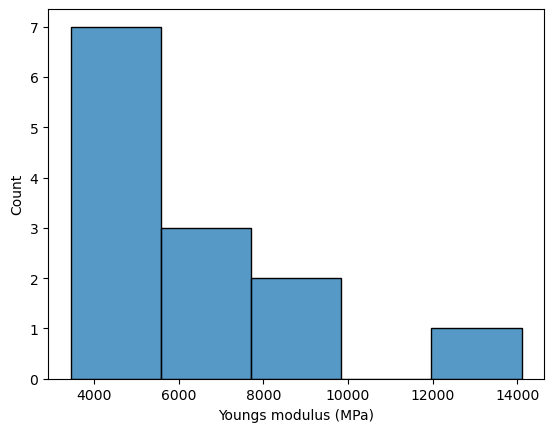

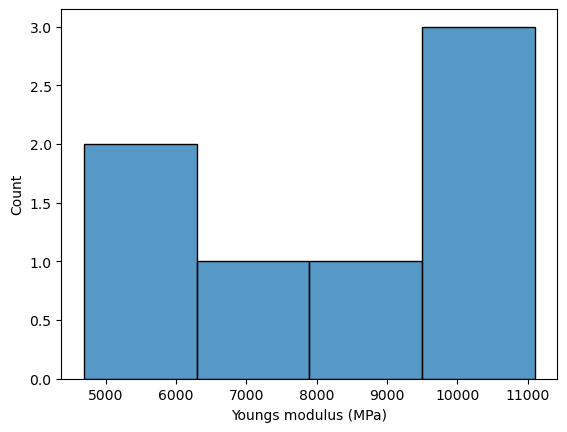

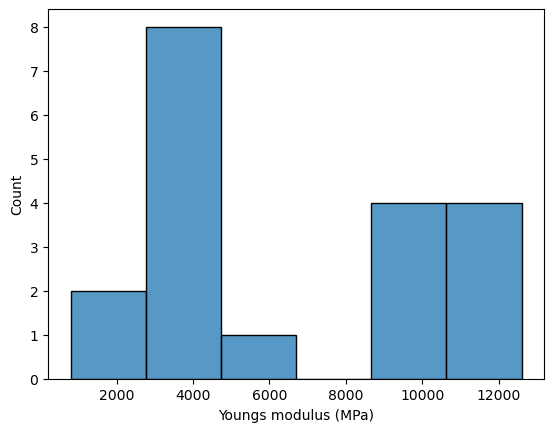

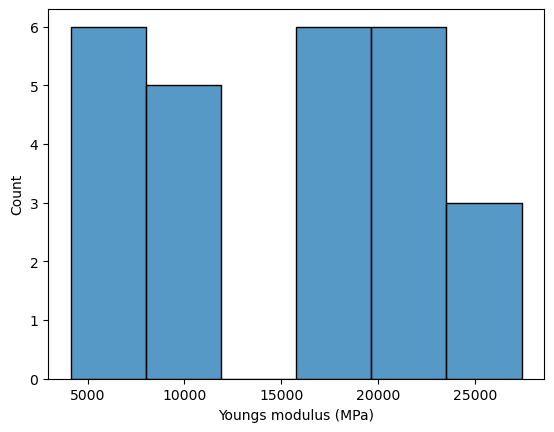

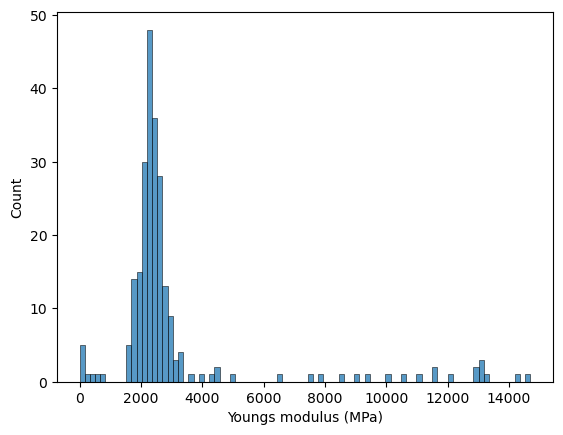

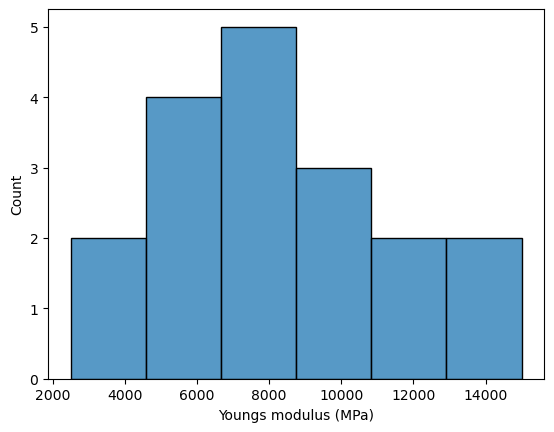

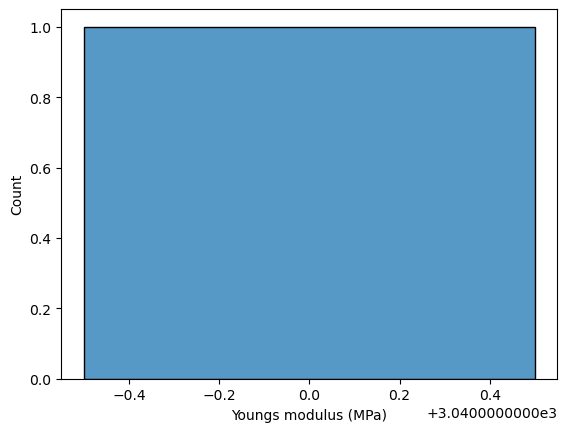

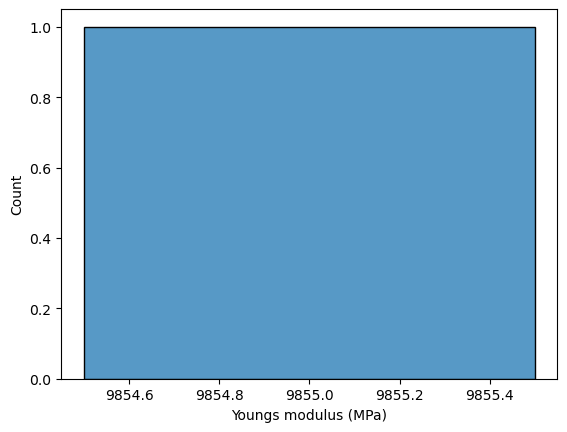

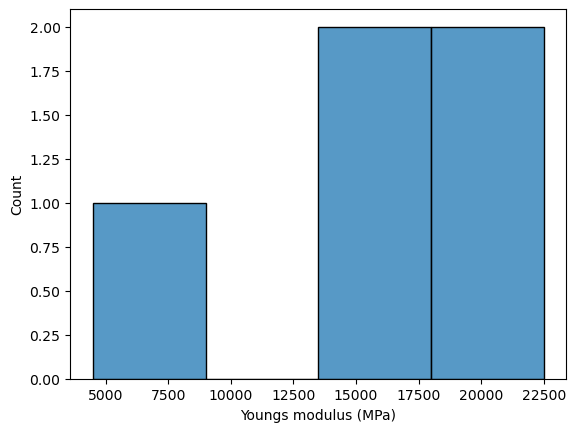

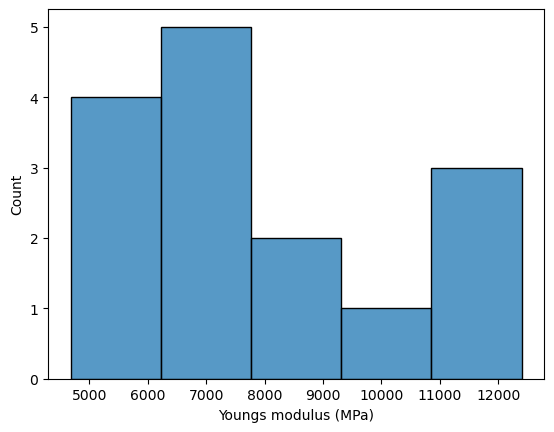

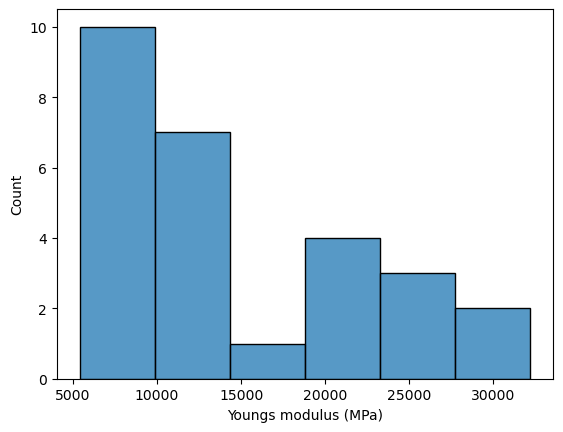

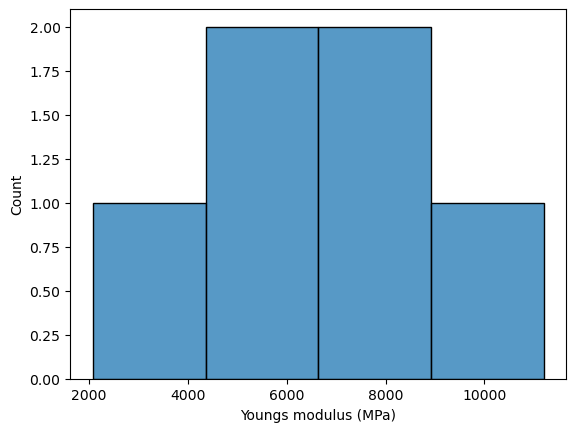

<Figure size 640x480 with 0 Axes>

In [30]:
for i in ['L', 'M', 'F', 'W', 'X', 'A', 'AA', 'S', 'XX', 'PR', 'H', 'CY']:
    a=sns.histplot(df[df['Polymer Types']==i],x='Youngs modulus (MPa)')
    plt.figure(i)
    print(a,i)
    

### Check for outliers

Box Plot AxesSubplot(0.125,0.11;0.775x0.77)
Box Plot AxesSubplot(0.125,0.11;0.775x0.77)
Box Plot AxesSubplot(0.125,0.11;0.775x0.77)


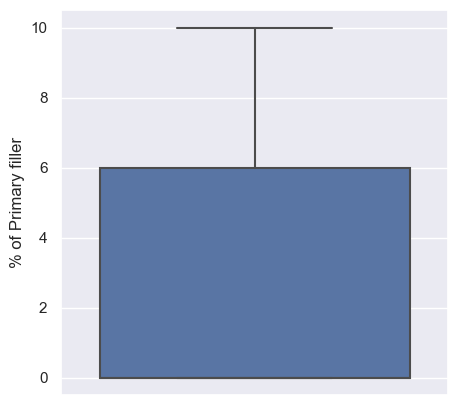

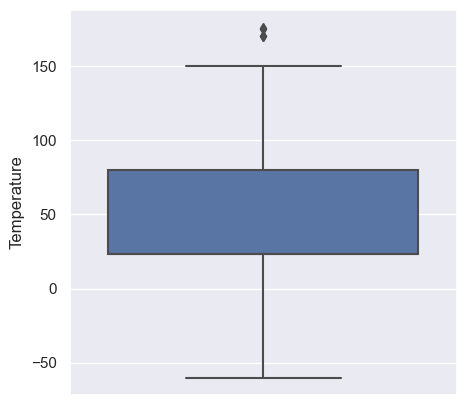

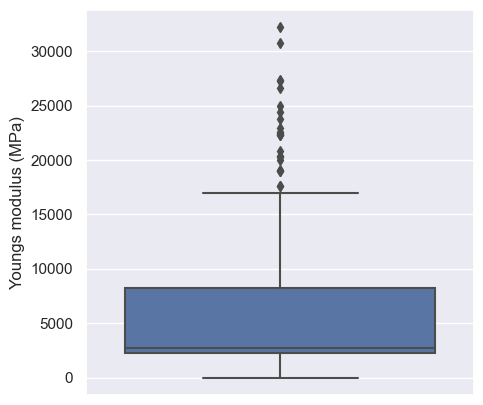

<Figure size 500x500 with 0 Axes>

In [31]:
sns.set(rc={'figure.figsize':(5,5)})
for i in ['% of Primary filler','Temperature','Youngs modulus (MPa)']:
 a=sns.boxplot(data=df,y=i)
 plt.figure(i)
 print("Box Plot",a)

In [32]:
for i in ['% of Primary filler','Temperature']:
    Q1 = np.percentile(df[i], 25, interpolation = 'midpoint')
    Q2 = np.percentile(df[i], 50, interpolation = 'midpoint')
    Q3 = np.percentile(df[i], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR

    df=df[(df[i]>low_lim) & (df[i]<up_lim)]

C:\Users\gokul\AppData\Local\Temp\ipykernel_38824\3063489896.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df[i], 25, interpolation = 'midpoint')
C:\Users\gokul\AppData\Local\Temp\ipykernel_38824\3063489896.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(df[i], 50, interpolation = 'midpoint')
C:\Users\gokul\AppData\Local\Temp\ipykernel_38824\3063489896.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint

In [33]:
df.shape

(374, 14)

### Bivarient Analysis

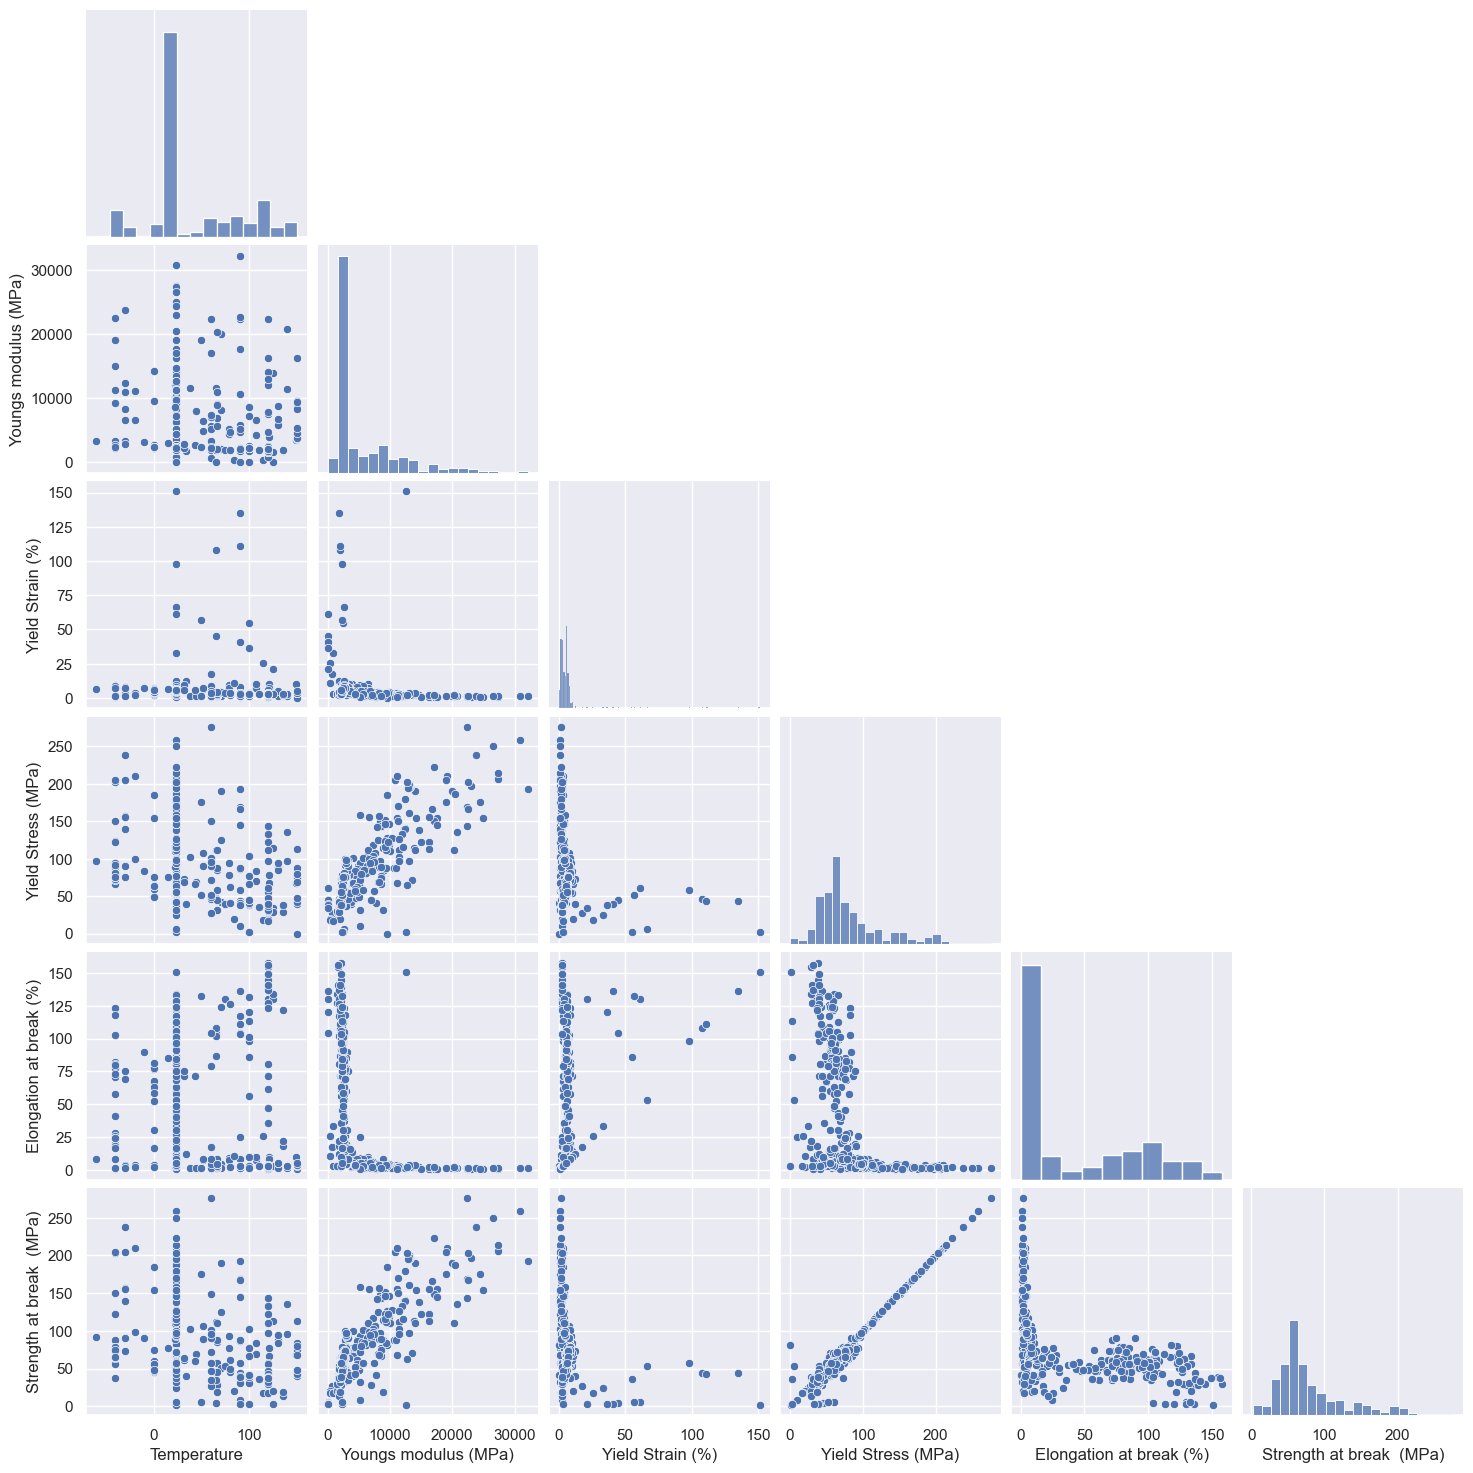

In [34]:
sns.pairplot(df[['Temperature','Youngs modulus (MPa)', 'Yield Strain (%)', 'Yield Stress (MPa)','Elongation at break (%)','Strength at break  (MPa)']],corner=True)

##### Yield Stress and Strength at break are lineraly correlated
##### Youngs modulus and strength at break are linearly correlated
##### Need to check for multi-collinearity

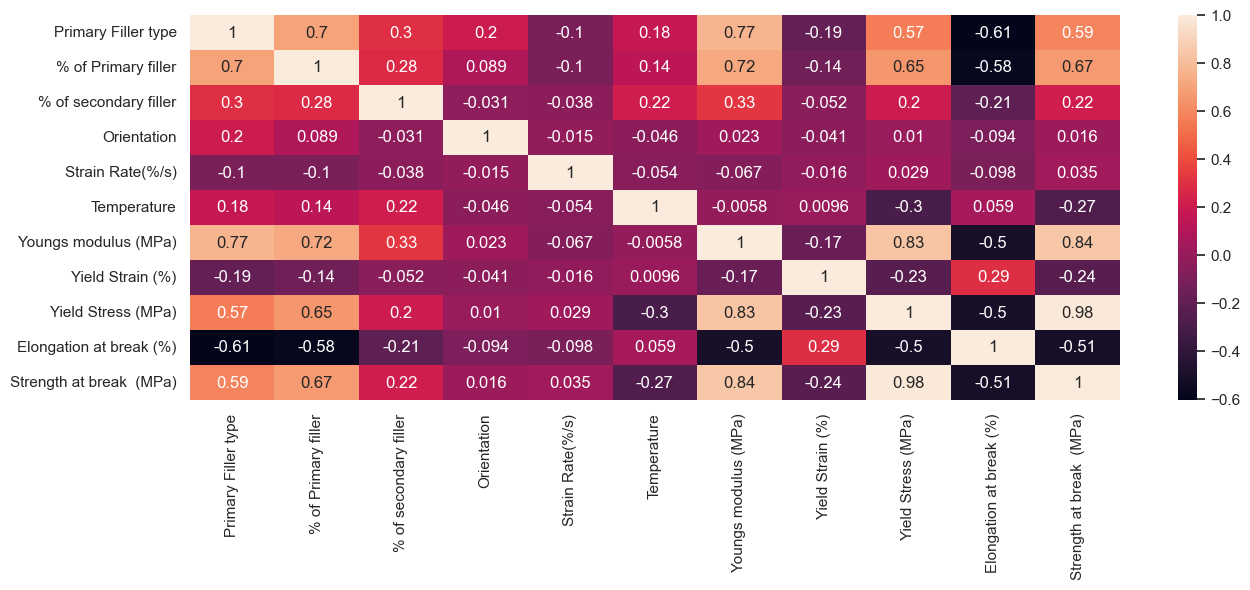

In [35]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

Primary filler has 0.77 correlation with youngs modulus

Youngs modulus and Strength at break have a correlaton of 0.84

Yield stress and Strength at break have of correlation of 0.99


In [36]:
#df.to_csv('data1.csv')

#AV = AutoViz_Class()
#dft=AV.AutoViz(filename='data1.csv')


# Data preparation for modeling

#### Label encoding the data-Converting labels/words into numeric form

In [37]:
le = LabelEncoder()
df['Polymer Types']=le.fit_transform(df['Polymer Types'])
df['Secondary filler type']=le.fit_transform(df['Secondary filler type'])
df['Quality']=le.fit_transform(df['Quality'])

In [38]:
# Checking the dataframe after the conversion
df.head()

,Polymer Types,Primary Filler type,% of Primary filler,Secondary filler type,% of secondary filler,Orientation,Strain Rate(%/s),Temperature,Youngs modulus (MPa),Yield Strain (%),Yield Stress (MPa),Elongation at break (%),Strength at break (MPa),Quality
1,5,1.0,6.0,0,0.0,0.0,0.0833,52.0,4870.0,6.6,89.6,7.4,88.9,1
2,5,1.0,6.0,0,0.0,0.0,0.0833,107.0,4190.0,7.3,70.0,7.7,69.6,1
3,5,1.0,6.0,0,0.0,0.0,0.0833,23.0,7270.0,4.0,118.0,5.9,117.0,1
4,5,1.0,6.0,0,0.0,0.0,0.0833,121.0,3870.0,10.0,77.6,10.0,77.6,1
5,5,1.0,6.0,0,0.0,0.0,0.0833,107.0,6530.0,10.1,84.1,10.1,84.1,1


##### Splitting the data for regression and classification

In [39]:
#Splitting the data for regression and classification
X_regression=df.iloc[:,0:8]
y_regression=df.iloc[:,8]

In [40]:
y_regression.head()

1    4870.0
2    4190.0
3    7270.0
4    3870.0
5    6530.0
Name: Youngs modulus (MPa), dtype: float64

In [41]:
X_classification=df.iloc[:,8:13]
y_classification=df['Quality']

#### Testing data for multi-collierity

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_regression.columns
vif['VIF'] = [variance_inflation_factor(X_regression.values, i) for i in range(X_regression.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Secondary filler type,14.36
4,% of secondary filler,14.27
1,Primary Filler type,3.39
2,% of Primary filler,3.10
7,Temperature,1.87
0,Polymer Types,1.69
5,Orientation,1.08
6,Strain Rate(%/s),1.03


##### % of secondary filler have high inflation factor. So dropping and checking whether VIF reduces

In [43]:
X_regression.drop(columns=['% of secondary filler'],inplace=True)

In [44]:
vif = pd.DataFrame()
vif['Features'] = X_regression.columns
vif['VIF'] = [variance_inflation_factor(X_regression.values, i) for i in range(X_regression.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Primary Filler type,3.36
2,% of Primary filler,3.04
6,Temperature,1.86
0,Polymer Types,1.67
3,Secondary filler type,1.27
4,Orientation,1.08
5,Strain Rate(%/s),1.03


##### All vif has reduced to below 5

In [45]:
X_regression= add_constant(X_regression)  #Statmodels default is without intercept, to add intercept we need to add constant 
X_train, X_test, y_train, y_test = train_test_split(X_regression, y_regression, test_size=0.2)


C:\Users\gokul\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [46]:
print(X_train.shape,X_test.shape)

(299, 8) (75, 8)


In [47]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Modelling-Regression

## Linear regression

In [48]:
model1 = LinearRegression()

In [49]:
model1.fit(X_train,y_train)
y_hat1 = model1.predict(X_test)
r2_train=model1.score(X_train,y_train)
r2_test=model1.score(X_test,y_test)
adj_r2_train=1-(1-r2_train)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
adj_r2_test=1-(1-r2_test)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
mae=mean_absolute_error(y_hat1,y_test)
mse=mean_squared_error(y_hat1,y_test)

In [50]:
print("R2 score for training data ",r2_train)
print("R2 score for testing data ",r2_test)
print("Adjusted R2 score for training data ",adj_r2_train)
print("Adjusted R2 score for test data ",adj_r2_test )
print('Mean Absolute Error ',mae )
print('Mean Squard Error', mse)

R2 score for training data  0.7234091541976393
R2 score for testing data  0.7023957312949884
Adjusted R2 score for training data  0.7157790618996431
Adjusted R2 score for test data  0.694185958365195
Mean Absolute Error  1881.4208577824454
Mean Squard Error 7293598.543955329


In [51]:
w0 = model1.intercept_
coff = pd.DataFrame()
coff['Features'] = X_regression.columns
coff['cofficient'] = model1.coef_
print('intercept:', w0)
print()
print(coff)

intercept: 5863.204180602006

                Features   cofficient
0                  const     0.000000
1          Polymer Types  1437.493638
2    Primary Filler type  3934.841624
3    % of Primary filler  2282.730188
4  Secondary filler type   781.060192
5            Orientation  -657.803980
6       Strain Rate(%/s)    67.256342
7            Temperature -1064.260361


##### The bias is really high for this model but the varience does not exist. The model is not capturing complexity of the data. (Underfitting)
##### Going for polynomial regression

## Polynomical regression

In [52]:
poly = PolynomialFeatures(3)
X_train1 = poly.fit(X_train)
X_train1 = poly.transform(X_train)
X_test1 = poly.transform(X_test)
model2 = LinearRegression()
model2.fit(X_train1,y_train)
y_hat1 = model2.predict(X_test1)
r2_train=model2.score(X_train1,y_train)
r2_test=model2.score(X_test1,y_test)
adj_r2_train=1-(1-r2_train)*(X_train1.shape[0]-1)/(X_train1.shape[0]-X_train1.shape[1]-1)
adj_r2_test=1-(1-r2_test)*(X_train1.shape[0]-1)/(X_train1.shape[0]-X_train1.shape[1]-1)
mae=mean_absolute_error(y_hat1,y_test)
mse=mean_squared_error(y_hat1,y_test)

print("R2 score for training data ",r2_train)
print("R2 score for testing data ",r2_test)
print("Adjusted R2 score for training data ",adj_r2_train)
print("Adjusted R2 score for test data ",adj_r2_test )
print('Mean Absolute Error ',mae )
print('Mean Squard Error', mse)

R2 score for training data  0.9602931692953152
R2 score for testing data  -3.6610947114416065e+23
Adjusted R2 score for training data  0.9110328154135633
Adjusted R2 score for test data  -8.203054315861645e+23
Mean Absolute Error  418927019568778.4
Mean Squard Error 8.972504048025236e+30


##### Here polynomical factor were added to the model. The bias has reduced but varinece has increased. (Overfitting)
##### Tried out different iteration with different order of polynomial and 3 had given the best result

## Lasso Regression

##### L1 Regularisation

In [53]:
model3 = Lasso(alpha=0.001)
model3.fit(X_train1,y_train)
y_hat = model3.predict(X_test1)
r2_train=model3.score(X_train1,y_train)
r2_test=model3.score(X_test1,y_test)
adj_r2_train=1-(1-r2_train)*(X_train1.shape[0]-1)/(X_train1.shape[0]-X_train1.shape[1]-1)
adj_r2_test=1-(1-r2_test)*(X_train1.shape[0]-1)/(X_train1.shape[0]-X_train1.shape[1]-1)
mae=mean_absolute_error(y_hat,y_test)
mse=mean_squared_error(y_hat,y_test)

C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.628e+08, tolerance: 1.084e+06
  model = cd_fast.enet_coordinate_descent(


In [54]:
print("R2 score for training data ",r2_train)
print("R2 score for testing data ",r2_test)
print("Adjusted R2 score for training data ",adj_r2_train)
print("Adjusted R2 score for test data ",adj_r2_test )
print('Mean Absolute Error ',mae )
print('Mean Squard Error', mse)

R2 score for training data  0.9515278565432495
R2 score for testing data  0.2711492696740101
Adjusted R2 score for training data  0.8913932424803634
Adjusted R2 score for test data  -0.6330640423845488
Mean Absolute Error  1752.997626395226
Mean Squard Error 17862460.9404902


##### Varience has reduced but still exist. Going of for L2 regularisation

## Ridge Regression

In [55]:
model4 = Ridge()
model4.fit(X_train1,y_train)
y_hat = model4.predict(X_test1)
r2_train=model4.score(X_train1,y_train)
r2_test=model4.score(X_test1,y_test)
adj_r2_train=1-(1-r2_train)*(X_train1.shape[0]-1)/(X_train1.shape[0]-X_train1.shape[1]-1)
adj_r2_test=1-(1-r2_test)*(X_train1.shape[0]-1)/(X_train1.shape[0]-X_train1.shape[1]-1)
mae=mean_absolute_error(y_hat,y_test)
mse=mean_squared_error(y_hat,y_test)

In [56]:
print("R2 score for training data ",r2_train)
print("R2 score for testing data ",r2_test)
print("Adjusted R2 score for training data ",adj_r2_train)
print("Adjusted R2 score for test data ",adj_r2_test )
print('Mean Absolute Error ',mae )
print('Mean Squard Error', mse)

R2 score for training data  0.9505504165606635
R2 score for testing data  0.8315284161005269
Adjusted R2 score for training data  0.8892031889855468
Adjusted R2 score for test data  0.6225223157741129
Mean Absolute Error  1127.5039774806692
Mean Squard Error 4128852.39977861


#### Produced almost similar result with little bit improvement. This can be the final model

In [57]:
model4.coef_.max()

2279.570808266484

In [58]:
round(model4.coef_.argmax()/3)

37

###### Young's modulus is heavy dependent on Strain Rate(%/s) variable

## Check for assumptions for Linear Regression

### Normality of residuals

In [59]:
errors = y_hat - y_test

Text(0.5, 1.0, 'Histogram of residuals')

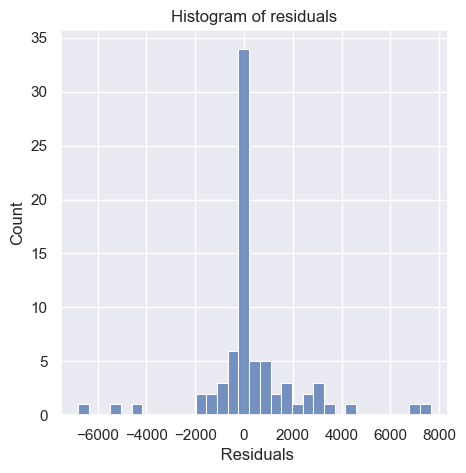

In [60]:
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

Errors are normally distributed

### Check for Heteroskedasticity and Linearity of variable

C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Youngs Modulus vs Residuals')

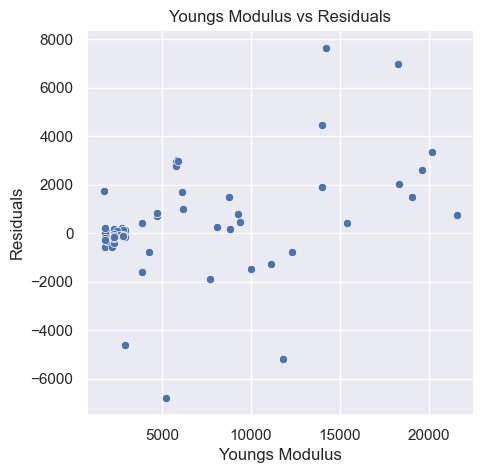

In [61]:
sns.scatterplot(y_hat,errors)
plt.xlabel("Youngs Modulus")
plt.ylabel("Residuals")
plt.title("Youngs Modulus vs Residuals")

No Heteroskedasticity as there is not specific pattern

Point are equally distributed on the both side of 0.

### Lasso Regression is the final model with accuracy of 89% and with least bias and varience

# Modelling-Classification

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.2)
# X_train=np.array(X_train).reshape(-1,)
# X_test=np.array(X_test).reshape(-1,)
# X_train.shape

## Logistice Regression

In [63]:
sc1 = StandardScaler()
sc1.fit(X_train)
X_train = sc1.transform(X_train)
X_test = sc1.transform(X_test)

In [64]:
train_scores = []
test_scores = []
for la in np.arange(0.01, 1.0, 0.001):
    model5 = LogisticRegression(C=1/la)
    model5.fit(X_train, y_train)
    y_hat_train=model5.predict(X_train)
    y_hat_test=model5.predict(X_test)
    train_score=recall_score(y_train,y_hat_train)
    test_score=recall_score(y_test,y_hat_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

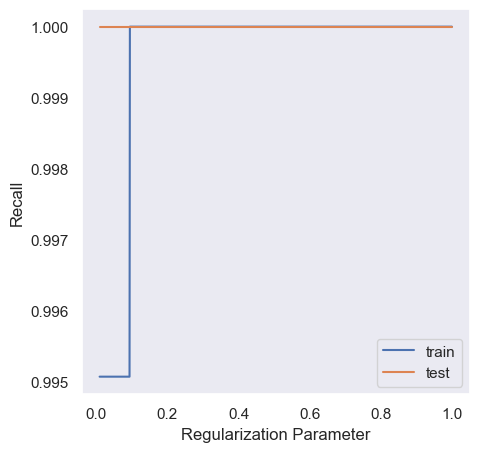

In [65]:
plt.figure()
plt.plot(list(np.arange(0.01, 1.0, 0.001)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 1.0, 0.001)), test_scores, label="test")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter")
plt.ylabel("Recall")
plt.grid()
plt.show()

In [66]:
# Best regulariation factor
la=0.01+(np.argmax(train_scores)+1)*0.001

In [67]:
print(la)

0.096


In [68]:
#best model
model5 = LogisticRegression(C=1/la)

In [69]:
model5.fit(X_train, y_train)

LogisticRegression(C=10.416666666666666)

In [70]:
y_hat_train=model5.predict(X_train)
y_hat_test=model5.predict(X_test)

In [71]:
model5.coef_

array([[ 0.11401628, -0.02042082, -0.95892619,  0.01943466,  1.03469187]])

Strength at break (MPa) has high correlation with quality

In [72]:
print('f1 score for train data is ', f1_score(y_train, y_hat_train))
print('Best Recall score for train data is ', max(train_scores))

f1 score for train data is  0.8152610441767069
Best Recall score for train data is  1.0


In [73]:
print('f1 score for test data is ',f1_score(y_test, y_hat_test))
print('Best Recall score for test data is ', max(test_scores))

f1 score for test data is  0.8160000000000001
Best Recall score for test data is  1.0


## Logistice Regression using polynominial feature

In [74]:
poly = PolynomialFeatures(4)
X_train2 = poly.fit(X_train)
X_train2 = poly.transform(X_train)
X_test2 = poly.transform(X_test)

In [75]:
train_scores = []
test_scores = []
for la in np.arange(0.01, 1.0, 0.01):
    model5 = LogisticRegression(C=1/la)
    model5.fit(X_train2, y_train)
    y_hat_train=model5.predict(X_train2)
    y_hat_test=model5.predict(X_test2)
    train_score=recall_score(y_train,y_hat_train)
    test_score=recall_score(y_test,y_hat_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

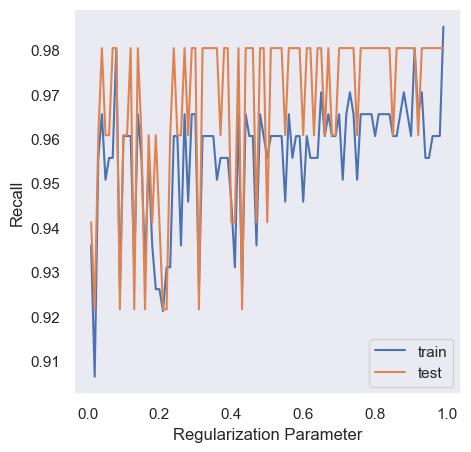

In [76]:
plt.figure()
plt.plot(list(np.arange(0.01, 1.0, 0.01)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 1.0, 0.01)), test_scores, label="test")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter")
plt.ylabel("Recall")
plt.grid()
plt.show()

In [77]:
# Best regulirisation factor
la=0.01+(np.argmax(train_scores)+1)*0.001

In [78]:
print(la)

0.109


In [79]:
model6 = LogisticRegression(C=1/la)
model6.fit(X_train2, y_train)
y_hat_train=model5.predict(X_train2)
y_hat_test=model5.predict(X_test2)

C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
print('f1 score for train data is ', f1_score(y_train, y_hat_train))
print('Best Recall score for train data is ', max(train_scores))

f1 score for train data is  0.8333333333333334
Best Recall score for train data is  0.9852216748768473


In [81]:
print('f1 score for test data is ',f1_score(y_test, y_hat_test))
print('Best Recall score for test data is ', max(test_scores))

f1 score for test data is  0.8196721311475409
Best Recall score for test data is  0.9803921568627451


## Decision Tree

In [82]:
model6 = tree.DecisionTreeClassifier()

In [83]:
model6.fit(X_train, y_train)

DecisionTreeClassifier()

In [84]:
y_hat_train=model6.predict(X_train)
y_hat_test=model6.predict(X_test)
train_score_recall=recall_score(y_train,y_hat_train)
test_score_recall=recall_score(y_test,y_hat_test)
train_score_F1=f1_score(y_train,y_hat_train)
test_score_F1=f1_score(y_test,y_hat_test)

In [85]:
print('Recall for decision tree on training data = ',train_score_recall)
print('F1 for decision tree on training data = ',train_score_F1)

Recall for decision tree on training data =  0.9950738916256158
F1 for decision tree on training data =  0.9950738916256159


In [86]:
print('Recall for decision tree on test data = ',test_score_recall)
print('F1 for decision tree on test data = ',test_score_F1)

Recall for decision tree on test data =  0.7647058823529411
F1 for decision tree on test data =  0.7647058823529412


Recall is really lower for test data

In [87]:
#tryin out with different criterion

In [88]:
model6 = tree.DecisionTreeClassifier(criterion= 'entropy')

In [89]:
model6.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [90]:
y_hat_train=model6.predict(X_train)
y_hat_test=model6.predict(X_test)
train_score_recall=recall_score(y_train,y_hat_train)
test_score_recall=recall_score(y_test,y_hat_test)
train_score_F1=f1_score(y_train,y_hat_train)
test_score_F1=f1_score(y_test,y_hat_test)

In [91]:
print('Recall for decision tree with entropy criterion on training data = ',train_score_recall)
print('F1 for decision tree on training data = ',train_score_F1)

Recall for decision tree with entropy criterion on training data =  0.9950738916256158
F1 for decision tree on training data =  0.9950738916256159


In [92]:
print('Recall for decision tree with entropy criterion on test data = ',test_score_recall)
print('F1 for decision tree on with entropy criterion test data = ',test_score_F1)

Recall for decision tree with entropy criterion on test data =  0.8823529411764706
F1 for decision tree on with entropy criterion test data =  0.8256880733944953


Recall is really lower for test data

## Random Forest

In [93]:
train_score_recall_list=[]
test_score_recall_list=[]
train_score_F1_list=[]
test_score_F1_list=[]

In [94]:
for n in range(20,200):
    model7=RandomForestRegressor(n_estimators=n)
    model7.fit(X_train, y_train)
    y_hat_train=model7.predict(X_train)
    y_hat_test=model7.predict(X_test)


    y_hat_train=y_hat_train.round()
    y_hat_test=y_hat_test.round()

    train_score_recall=recall_score(y_train,y_hat_train)
    test_score_recall=recall_score(y_test,y_hat_test)
    train_score_F1=f1_score(y_train,y_hat_train)
    test_score_F1=f1_score(y_test,y_hat_test)
    
    train_score_recall_list.append(train_score_recall)
    test_score_recall_list.append(test_score_recall)
    train_score_F1_list.append(train_score_F1)
    test_score_F1_list.append(train_score_F1)


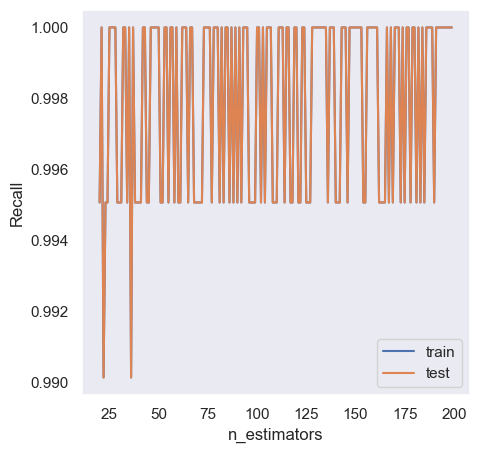

In [95]:
plt.figure()
plt.plot(list(np.arange(20,200)), train_score_recall_list, label="train")
plt.plot(list(np.arange(20,200)), train_score_recall_list, label="test")
plt.legend(loc='lower right')

plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.grid()
plt.show()

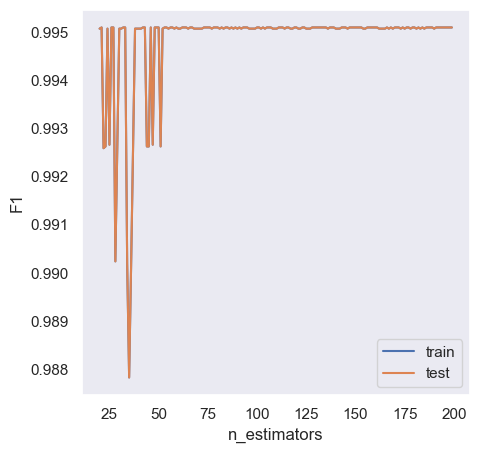

In [96]:
plt.figure()
plt.plot(list(np.arange(20,200)), train_score_F1_list, label="train")
plt.plot(list(np.arange(20,200)), test_score_F1_list, label="test")
plt.legend(loc='lower right')

plt.xlabel("n_estimators")
plt.ylabel("F1")
plt.grid()
plt.show()

In [97]:
print('Recall for Random Forest tree on training data = ',train_score_recall_list[50])
print('F1 for Random Forest on training data = ',train_score_F1_list[50])

Recall for Random Forest tree on training data =  0.9950738916256158
F1 for Random Forest on training data =  0.9950738916256159


In [98]:
print('Recall for Random Forest on test data = ',test_score_recall_list[50])
print('F1 for Random Forest on test data = ',test_score_F1_list[50])

Recall for Random Forest on test data =  0.8627450980392157
F1 for Random Forest on test data =  0.9950738916256159


Recall is lower than logistic regression

### Logistic Regression is the final model with best recall and with best f1 score on test data (0.85)

# Bussiness Insights

1) Ridge Regression is the best model for predicting Youngs Modulus with an accuracy of 89% and with the least bias and variance

2) Logistic Regression is the final model with the best recall and with the best f1 score on test data (0.85)

3) Yield Stress and Strength at break are linearly correlated

4) Youngs modulus and strength at break are linearly correlated

5) Larger majority of data is for good-quality items. So data is imbalanced.

6) Since data is imbalanced we can not go for accuracy. Classifying a bad-quality item as good quality can affect the reputation of the company. So a model with more False Negatives is to be penalized. We need to optimize the algorithm for best Recall.

7) Multi-collinearity existed between the Secondary filler type and % of secondary filler. So, % of secondary filler (for linear regression Multi-collinearity should not exist.

8) Youngs modulus has high correlation with Strain Rate(%/s), Primaray filler and % primary filler. 

9) Strength at break (MPa) have a high correlation with the quality of the item. Strength has a high correlation with Yield stress and youngs modulus

# Recommendation

1) Use Ridge Regression with polynomial features of order 3 for predicting youngs modulus

2) Use Logistic regression to predict the quality of the product

3) Strength at break (MPa) should be high for best-quality items

F= 0.8333333333333334
